In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
import scipy as sp

### Uncomment below if you want to run on your modified code
#import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf

# Implied BS volatility Skew (Fig. 1)

In [3]:
texp = 1
fwd = 1
k = np.arange(0.3, 2.01, 0.05)
strike = k*fwd

In [4]:
sigma = 0.5
norm = pf.Norm(sigma)
dbs1 = pf.BsmDisp(sigma, beta=1/3, pivot=fwd)
dbs2 = pf.BsmDisp(sigma, beta=2/3, pivot=fwd)
p = norm.price(strike, fwd, texp)

In [5]:
ivbs_0 = norm.vol_smile(strike, fwd, texp, model='bsm-approx')
ivbs_1 = dbs1.vol_smile(strike, fwd, texp, model='bsm-approx')
ivbs_2 = dbs2.vol_smile(strike, fwd, texp, model='bsm-approx')
ivbs = 0.5*np.ones_like(strike)

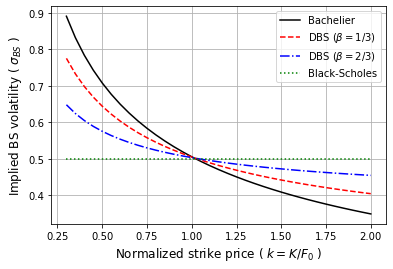

In [6]:
labels = ['Bachelier', 'DBS ($\\beta=1/3$)', 'DBS ($\\beta=2/3$)', 'Black-Scholes']
ls = ['-', '--', '-.', ':']
colors = ['k', 'r', 'b', 'g']

iv_arr = np.array([ivbs_0, ivbs_1, ivbs_2, ivbs])

for j in np.arange(len(iv_arr)):
    plt.plot(k, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Normalized strike price ( $k = K/F_0$ )', fontsize=12)
plt.ylabel('Implied BS volatility ( $\\sigma_{BS}$ )', fontsize=12)
plt.legend()
plt.grid()
#plt.savefig('iv-bs-skew.pdf', bbox_inches='tight')
#plt.savefig('iv-bs-skew.png', bbox_inches='tight')
plt.show()

# Equivalent Bachelier Volatility (Fig. 2)

In [7]:
texp = 1
fwd = 1
k = np.arange(0.1, 1.5, 0.05)
strike = k*fwd

In [8]:
sigma = 2
bsm = pf.Bsm(sigma)
norm = pf.Norm(sigma)
p = bsm.price(strike, fwd, texp)

In [9]:
ivn_0 = bsm.vol_smile(strike, fwd, texp)
assert np.max( np.fabs(pf.Norm(ivn_0).price(strike, fwd, texp) - p) ) < 1e-10
ivn_1 = bsm.vol_smile(strike, fwd, texp, model='norm-grunspan')
ivn_2 = bsm.vol_smile(strike, fwd, texp, model='norm-approx')

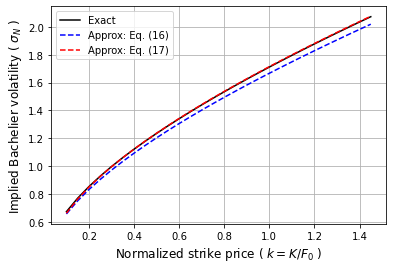

In [10]:
labels = ['Exact', 'Approx: Eq. (16)', 'Approx: Eq. (17)']
ls = ['-', '--', '--']
colors = ['k', 'b', 'r']

iv_arr = np.array([ivn_0, ivn_1, ivn_2])

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Normalized strike price ( $k = K/F_0$ )', fontsize=12)
plt.ylabel('Implied Bachelier volatility ( $\\sigma_{N}$ )', fontsize=12)
plt.legend()
plt.grid()
#plt.savefig('iv-bs2norm.pdf', bbox_inches='tight')
#plt.savefig('iv-bs2norm.png', bbox_inches='tight')
plt.show()

# Delta (Fig. 3)

In [11]:
texp = 1
fwd = 1
k = np.arange(0.7, 1.31, 0.05)
strike = k*fwd
sigma = 0.5
bs = pf.Bsm(sigma)
p = bs.price(strike, fwd, texp)
d_bs = bs.delta(strike, fwd, texp=1)

In [12]:
norm = pf.Norm(sigma)
dbs1 = pf.BsmDisp(sigma, beta=1/3,pivot=fwd)
dbs2 = pf.BsmDisp(sigma, beta=2/3,pivot=fwd)

In [13]:
norm.impvol(p, strike, fwd, texp, setval=True)
assert(np.max(np.abs(norm.price(strike, fwd, texp) - p))<1e-12)
d_norm = norm.delta(strike, fwd, texp)

dbs1.impvol(p, strike, fwd, texp, setval=True)
assert(np.max(np.abs(dbs1.price(strike, fwd, texp) - p))<1e-12)
d_dbs1 = dbs1.delta(strike, fwd, texp)

dbs2.impvol(p, strike, fwd, texp, setval=True)
assert(np.max(np.abs(dbs2.price(strike, fwd, texp) - p))<1e-12)
d_dbs2 = dbs2.delta(strike, fwd, texp)

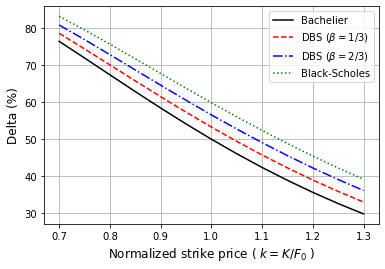

In [14]:
labels = ['Bachelier', 'DBS ($\\beta=1/3$)', 
          'DBS ($\\beta=2/3$)', 'Black-Scholes']
ls = ['-', '--', '-.', ':']
colors = ['k', 'r', 'b', 'g']

iv_arr = np.array([d_norm, d_dbs1, d_dbs2, d_bs])*100

for j in np.arange(len(iv_arr)):
    plt.plot(k, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Normalized strike price ( $k = K/F_0$ )', fontsize=12)
plt.ylabel('Delta (%)', fontsize=12)
plt.legend()
plt.grid()
#plt.savefig('delta.pdf', bbox_inches='tight')
#plt.savefig('delta.png', bbox_inches='tight')
plt.show()

# Backbone (Fig. 4)

In [15]:
texp = 1
fwd = 1
k = np.arange(0.7, 1.21, 0.05)
strike = k*fwd
sigma = 0.5
bs = pf.Bsm(sigma)
norm = pf.Norm(sigma)

In [16]:
iv1 = norm.vol_smile(strike, fwd, texp)
iv2 = norm.vol_smile(strike, fwd-0.1, texp)

In [17]:
fwd2 = fwd + np.arange(-0.16, 0.07, 0.025)
iv_atm = norm.vol_smile(fwd2, fwd2, texp)
iv_atm

array([0.60430882, 0.5863261 , 0.56939704, 0.55343052, 0.53834573,
       0.52407079, 0.51054147, 0.49770027, 0.48549547, 0.47388047])

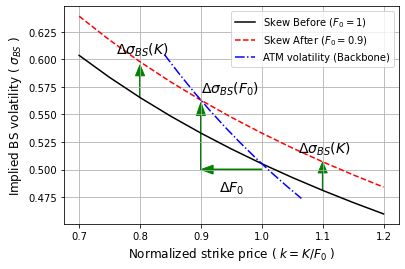

In [18]:
labels = ['Skew Before ($F_0=1$)', 'Skew After ($F_0=0.9$)', 'ATM volatility (Backbone)']
ls = ['-', '--', '-.', ':']
colors = ['k', 'r', 'b', 'g']

iv_arr = [iv1, iv2, iv_atm]

for j in np.arange(len(iv_arr)-1):
    plt.plot(k, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.plot(fwd2, iv_arr[j+1], color=colors[j+1], linestyle=ls[j+1], label=labels[j+1])

plt.xlabel('Normalized strike price ( $k = K/F_0$ )', fontsize=12)
plt.ylabel('Implied BS volatility ( $\\sigma_{BS}$ )', fontsize=12)
plt.arrow(1, 0.5, -0.08, 0, head_width=0.008, head_length=0.02, color='green')
plt.text(0.93, 0.48, '$\Delta F_0$', fontsize=14)
plt.arrow(0.9, 0.5, 0, 0.049, head_width=0.015, head_length=0.012, color='green')
plt.text(0.9, 0.57, '$\Delta \sigma_{BS}(F_0)$', fontsize=14)

plt.grid()
plt.arrow(0.8, 0.565, 0, 0.02, head_width=0.015, head_length=0.01, color='green')
plt.text(0.76, 0.605, '$\Delta \sigma_{BS}(K)$', fontsize=14)
plt.arrow(1.1, 0.481, 0, 0.016, head_width=0.015, head_length=0.01, color='green')
plt.text(1.06, 0.515, '$\Delta \sigma_{BS}(K)$', fontsize=14)
plt.legend()
#plt.savefig('backbone.pdf', bbox_inches='tight')
#plt.savefig('backbone.png', bbox_inches='tight')
plt.show()

# NSVh Smile (Fig. 5)

In [19]:
texp = 1
fwd = 100
k = np.arange(0.6, 1.401, 0.02)
strike = k*fwd
sigma = 20
norm = pf.Norm(sigma)

## Upper: Changing vol-of-vol ($\nu$)
Run only one of the below

In [20]:
model_name = 'NSVh Model'
file_name = 'nsvh-vov'

vov_arr = np.array([0.1, 0.2, 0.3])[:, None]

nsvh = pf.Nsvh1(sigma, vov=vov_arr, rho=0.1, is_atmvol=True)
iv_arr = nsvh.vol_smile(strike, fwd, texp)

In [21]:
"""
model_name = 'SABR Model ($\\beta=0$)'
file_name = 'sabr0-vov'

vov_arr = np.array([0.1, 0.2, 0.3])[:, None]

sabr = pf.SabrNorm(sigma, vov=vov_arr, rho=0.1, is_atmvol=True)
iv_arr = sabr.vol_for_price(strike, fwd, texp)
"""

"\nmodel_name = 'SABR Model ($\\beta=0$)'\nfile_name = 'sabr0-vov'\n\nvov_arr = np.array([0.1, 0.2, 0.3])[:, None]\n\nsabr = pf.SabrNorm(sigma, vov=vov_arr, rho=0.1, is_atmvol=True)\niv_arr = sabr.vol_for_price(strike, fwd, texp)\n"

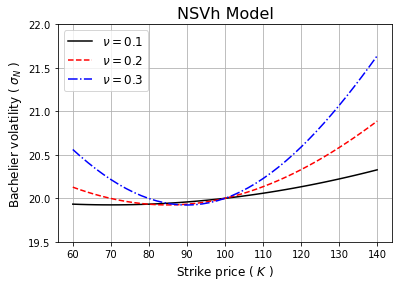

In [22]:
labels = ['$\\nu=0.1$', '$\\nu=0.2$', '$\\nu=0.3$']
ls = ['-', '--', '-.']
colors = ['k', 'r', 'b']

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Strike price ( $K$ )', fontsize=12)
plt.ylabel('Bachelier volatility ( $\\sigma_{N}$ )', fontsize=12)
plt.title(model_name, fontsize=16)

plt.legend(fontsize=12)
plt.ylim([19.5, 22])
plt.grid()
#plt.savefig(f'{file_name}.pdf', bbox_inches='tight')
#plt.savefig(f'{file_name}.png', bbox_inches='tight')
plt.show()

## Lower: Changing vol-of-vol ($\rho$)
Run only one of the below

In [23]:
model_name = 'NSVh Model'
file_name = 'nsvh-rho'

rho_arr = np.array([-0.1, 0.1, 0.3])[:, None]

nsvh = pf.Nsvh1(sigma, vov=0.2, rho=rho_arr, is_atmvol=True)
iv_arr = nsvh.vol_smile(strike, fwd, texp)

In [24]:
"""
model_name = 'SABR Model ($\\beta=0$)'
file_name = 'sabr0-rho'

rho_arr = np.array([-0.1, 0.1, 0.3])[:, None]

sabr = pf.SabrNorm(sigma, vov=0.2, rho=rho_arr, is_atmvol=True)
iv_arr = sabr.vol_for_price(strike, fwd, texp)
"""

"\nmodel_name = 'SABR Model ($\\beta=0$)'\nfile_name = 'sabr0-rho'\n\nrho_arr = np.array([-0.1, 0.1, 0.3])[:, None]\n\nsabr = pf.SabrNorm(sigma, vov=0.2, rho=rho_arr, is_atmvol=True)\niv_arr = sabr.vol_for_price(strike, fwd, texp)\n"

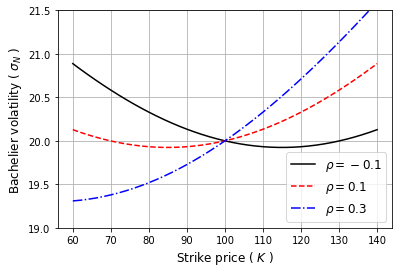

In [25]:
labels = ['$\\rho=-0.1$', '$\\rho=0.1$', '$\\rho=0.3$']
ls = ['-', '--', '-.']
colors = ['k', 'r', 'b']

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Strike price ( $K$ )', fontsize=12)
plt.ylabel('Bachelier volatility ( $\\sigma_{N}$ )', fontsize=12)
#plt.title(model_name, fontsize=16)

plt.legend(fontsize=12)
plt.ylim([19, 21.5])
plt.grid()
#plt.savefig(f'{file_name}.pdf', bbox_inches='tight')
#plt.savefig(f'{file_name}.png', bbox_inches='tight')
plt.show()

# Barrier Option (Fig. 6)

In [26]:
texp = 1
fwd = 1
strike = 1
barrier_dn = np.arange(0.1, 0.971, 0.025)
barrier = np.array([barrier_dn, 1 +1.5* (1-barrier_dn[::-1])])
cp = np.array([[-1], [1]])
sigma = 0.5
bs = pf.Bsm(sigma)
p = 0.2
bs.impvol(p, strike, fwd, texp, setval=True)

0.5066942062713917

In [27]:
norm = pf.Norm(sigma)
norm.impvol(p, strike, fwd, texp, setval=True)
bar1 = pf.BsmDisp(sigma, beta=1/3, pivot=fwd)
bar1.impvol(p, strike, fwd, texp, setval=True)
bar2 = pf.BsmDisp(sigma, beta=2/3, pivot=fwd)
bar2.impvol(p, strike, fwd, texp, setval=True)
bar3 = pf.BsmDisp(sigma, beta=1, pivot=fwd)
bar3.impvol(p, strike, fwd, texp, setval=True)

0.5066942062713917

In [28]:
p0dn = norm.price_barrier(strike, barrier, fwd, texp, cp=cp)
p1dn = bar1.price_barrier(strike, barrier, fwd, texp, cp=cp)
p2dn = bar2.price_barrier(strike, barrier, fwd, texp, cp=cp)
p3dn = bar3.price_barrier(strike, barrier, fwd, texp, cp=cp)

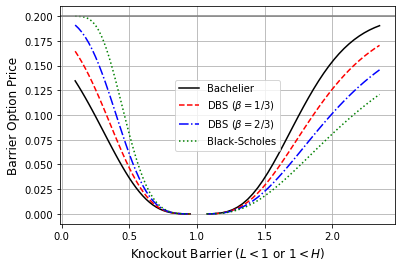

In [29]:
labels = ['Bachelier', 'DBS ($\\beta=1/3$)', 
          'DBS ($\\beta=2/3$)', 'Black-Scholes']
ls = ['-', '--', '-.', ':']
colors = ['k', 'r', 'b', 'g']

iv_arr = np.array([p0dn, p1dn, p2dn, p3dn])
for j in np.arange(len(iv_arr)):
    plt.plot(barrier[0], iv_arr[j][0], color=colors[j], linestyle=ls[j], label=labels[j])
    plt.plot(barrier[1], iv_arr[j][1], color=colors[j], linestyle=ls[j])

plt.axhline(y=p, color='gray', linestyle='-')
#for j in np.arange(len(iv_arr)):

plt.xlabel('Knockout Barrier ($L<1$ or $1<H$)', fontsize=12)
plt.ylabel('Barrier Option Price', fontsize=12)
plt.legend()
plt.grid()
#plt.savefig('barrier.pdf', bbox_inches='tight')
#plt.savefig('barrier.png', bbox_inches='tight')
plt.show()